In [1]:
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib as mlp
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

MNIST with binary classification

In [2]:
# Fetch the MNIST data using sklearn
mnist = fetch_openml('mnist_784', version=1)

In [27]:
# For this binary classification task, we will try to classify the MNIST digits
# as 5/not-5. We can use the structure of the sklearn MNIST data to get both our
# data and labels:
X = mnist.data
y = mnist.target
X = X.to_numpy()
y = y.to_numpy()

Label:  2


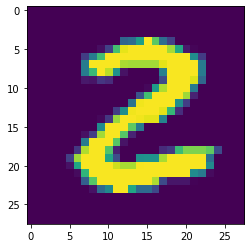

In [4]:
# As an example, plot a row from the dataset. You can see different examples
# by rerunning this cell with different values of I.
I = 25

print("Label: ", y[I])
plt.imshow(X.iloc[I].values.reshape(28,28))
plt.show()

In [15]:
# Currently, targets are strings containing the number associated with each row
# of target data. We need to change this to a binary 5/not-5 value.
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [16]:
# We can do this with a simple Boolean expression:
y_5 = y == '5'
y_5

0         True
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998     True
69999    False
Name: class, Length: 70000, dtype: bool

In [17]:
# Retrieve the train/test split from the dataset.
# The MNIST digits are already divided into a train/test split:
# the first 60,000 rows are the training set, and the rest are the test set.
X_train, y_train_5, X_test, y_test_5 = X[:60000], y_5[:60000], X[60000:], y_5[60000:]

len(X_train), len(X_test)

(60000, 10000)

In [23]:
# Let's do a 3-fold cross validation to evaluate two different models.

model_sgd = SGDClassifier()
sgd_scores = cross_val_score(model_sgd, X_train, y_train_5, cv=3, scoring="f1")

In [25]:
sgd_scores

array([0.6757046 , 0.75064935, 0.81468633])

In [28]:
model_knn = KNeighborsClassifier()
knn_scores = cross_val_score(model_knn, X_train, y_train_5, cv=3, scoring="f1")

In [ ]:
knn_scores

array([0.9671675 , 0.9610245 , 0.96143097])

In [35]:
from sklearn import metrics
# K-nearest-neighbors is performing better, so we select it and evaluate on the
# test set for a final performance measue.
model_knn.fit(X_train, y_train_5)
y_pred = model_knn.predict(X_test)
metrics.f1_score(y_test_5, y_pred)

0.9655172413793103

MNIST with multiclass classification

In [10]:
# Try K-NN. This time, we'll evaluate on accuracy, since that is
# what the homework wants.

# We are doing multiclass classification. Get the original numeric data:
y_train_multiclass, y_test_multiclass =y[:60000], y[60000:]
y_train_multiclass

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [24]:
# Try 3-fold cross-validation on a K-nearest-neighbor using the default settings.

model_knn = KNeighborsClassifier()

# The model will automatically train as multiclass because it has all 10
# numeric labels in y.
knn_scores = cross_val_score(model_knn, X_train, y_train_multiclass, cv=3, scoring="accuracy")
print("KNN", knn_scores)

KNN [0.9676  0.9671  0.96755]


In [ ]:
# Start Question 2 of the homework here. Try to get a final score above 97%
# with multiclass classification using a grid search.


In [29]:
clf = KNeighborsClassifier(n_neighbors=1, weights="uniform")

In [31]:
clf= KNeighborsClassifier ()

In [ ]:
param_grid = [{ "n_neighbors": [1, 3, 5, 7], "weights": ["uniform", "distance"]}]
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring= "accuracy", return_train_score=False, verbose=2)
grid_search.fit(X_train, y_train_multiclass)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END .....................n_neighbors=1, weights=uniform; total time=  41.6s
[CV] END .....................n_neighbors=1, weights=uniform; total time=  52.7s
[CV] END .....................n_neighbors=1, weights=uniform; total time=  51.8s
[CV] END ....................n_neighbors=1, weights=distance; total time=  44.0s


In [ ]:
final clf = grid_search.best_estimator_

In [ ]:
final_clf_score(X_test,y_test)